<h1>k-armed bandits</h1>
<h4>Model each bandit as a slot machine maximize the expected reward $E[R_k]$</h4>
<h4>Doesnt specify if this is a $E_{max}[R_k]$ for a single bandit or E_{max}[\sum R_k]</h4> 
<h4>Each of k-actions is a pull of a single lever and it returns a reward. A value or reward from an action is $q_*()$</h4>
$q_*(a) \doteq E[R_t | A_t=a]$
<br />
<h4>Notation: $q_*(a)$ is the value of an action, a</h4>
<h4>Notation: $Q_t(a)$ is the estimate of q. An estimate is based on prior knowledge. If you pulled k for the first time
then there is some probability you expect a reward. For $Q_t$ our estimate is based on $Q_{t-1}$</h4>
<h4>Refining the knowleddge of Q is exploration. We can pull the lever 10 times, record each value and predict what Q_t is based on the past results.</h4>

<h2>Sample Averages</h2>
<h4>What is N for Central Limit Theorem? </h4>
<h4>Simulate a k armed bandit for ads. Assume there are 3 ads with different probabilities of returninisg a click. This is a binomial probablity and we want to develop some intuition on how to determine the actual probabilities. </h4>


<h1>Binomial PMF </h1>
$P(N=n) = \binom{\,n}{N}p^N(1-p)^{n-N} $



#https://github.com/christianversloot/machine-learning-articles/blob/main/simple-multi-options-a-b-n-test-with-multi-armed-bandit-in-python.md

In [130]:
import numpy as np
import matplotlib.pyplot as plt

class Ads:
    def __init__(self,p):
        #(n, p, N)
        # if leave N off what is default? 
        self.p=p
    def click(self):
        return np.random.binomial(1,self.p)
    def simulate(self, num_trials=10, N=1):
        for num in range(num_trials):
            num_clicks = 0
            for idx in range(N):
                num_clicks += self.click()
                #print("click", click)
            print(f"{num_clicks/N}")
    def simulate_run(self):
        self.simulate(num_trials=10, N=10)
        print("*"*10)
        self.simulate(num_trials=10, N=100)
        print("*"*10)
        self.simulate(num_trials=10, N=1000)
        print("*"*10)
        self.simulate(num_trials=10, N=10000)
    def q(self, q = 0, N=10):
        num_clicks=0
        for idx in range(N):
            click = self.click    
                

In [129]:
#N=10 to get 0.1
ad = Ads(0.1)
N=10
num_trials=10
num_clicks = 0
print("10 trials of 10 clicks see 0.1?")
for num in range(num_trials):
    num_clicks = 0
    for idx in range(N):
        click =ad.click()
        num_clicks += click
        #print("click", click)
    print(f"{num_clicks/N}")
print("*"*10)
print("10 trials of 100 clicks see 0.1?")
N=100
num_clicks = 0
for num in range(num_trials):
    num_clicks = 0
    for idx in range(N):
        click =ad.click()
        num_clicks += click
        #print("click", click)
    print(f"{num_clicks/N}")
print("*"*10)
print("10 trials of 1000 clicks see 0.1?")
N=1000

for num in range(num_trials):
    num_clicks = 0
    for idx in range(N):
        click =ad.click()
        num_clicks += click
        #print("click", click)
    print(f"{num_clicks/N}")
N=10000
num_clicks = 0
print("*"*10)
print("10 trials of 10000 clicks see 0.1?")
for num in range(num_trials):
    num_clicks = 0
    for idx in range(N):
        click =ad.click()
        num_clicks += click
        #print("click", click)
    print(f"{num_clicks/N}")


10 trials of 10 clicks see 0.1?
0.2
0.1
0.0
0.0
0.0
0.0
0.0
0.3
0.1
0.2
**********
10 trials of 100 clicks see 0.1?
0.08
0.09
0.08
0.12
0.1
0.12
0.13
0.09
0.04
0.15
**********
10 trials of 1000 clicks see 0.1?
0.101
0.107
0.107
0.085
0.1
0.092
0.102
0.098
0.109
0.083
**********
10 trials of 10000 clicks see 0.1?
0.0958
0.0951
0.0975
0.1019
0.0966
0.1039
0.0984
0.0995
0.0959
0.0999


<h4>See 1000 clicks every run produces .1. Use p-test to measure average? Averages follow a normal distribution. 
Simple metric 10 trial runs produce 0 error in sampling. So N is big enough @1000 for x.xx digit accuracy. </h4>

In [111]:
ad = Ads(0.01)
ad.simulate_run()

0.0
0.0
0.1
0.0
0.0
0.0
0.0
0.0
0.0
0.0
**********
0.02
0.02
0.02
0.0
0.0
0.01
0.01
0.02
0.0
0.01
**********
0.007
0.01
0.003
0.007
0.01
0.013
0.005
0.011
0.014
0.012
**********
0.0109
0.0086
0.0108
0.0098
0.0086
0.0101
0.0103
0.0097
0.0094
0.0106


<h2>Back to agents</h2>
<h4>What is the problem? Find the highest perfoming ad? If there are 3 ads with .01, .02 and .001 CTRs do we want to find the single highest performing ad or do we want to optimize the return for all the clicks for all 3 ads? The book covers the first case but in reality we want the second case </h4>
<h4>$Q(a)$ is the agent's estimate of the expected reward</h4>
$Q(a) = E[R|A=a]$
<h4>where R and A are random variables</h4>
<br />
<h4>We are going to compare Q using sample average vs. incremental updates</h4>
<h4>Sample average</h4>
The sample average is $Q_t(a) = \frac{1}{N_t(a)}\sum\limits_{i=0}^{N_t(a)} r_i $
<br/>
this sample average is the same as the estimated probability 
<h4>Incremental update </h4>
<br/>
<h4>Define $Q_n$ as n-1 average rewards</h4>
<br/>
$Q_n = \frac{R_1+R_2+R_3+...+R_{n-1}}{n-1}= \frac{1}{n-1}\sum\limits_{i=1}^{n-1}R_i$
<br/>
$Q_{n+1} = \frac{1}{n} \sum\limits_{i=1}^{n} R_i$
<br/>

$=\frac{1}{n}(R_n + \sum\limits_{i=1}^{n-1}R_i)$
<br/>
$=\frac{1}{n}(R_n + (n-1)\frac{1}{n-1}\sum\limits_{i=1}^{n-1}R_i)$<br/>
<br/>

$=\frac{1}{n}(R_n+(n-1)Q_n)$
<br/>
$=\frac{1}{n}(R_n + nQ_n - Q_n)$
<br/>
$=Q_n+\frac{1}{n}(R_n-Q_n)$
<br/>
<br />
$Q_{t+1} (a) = Q_t (a) + \alpha(r_t - Q_t(a))$
<br/>

<h4>$\alpha = \frac{1}{n}$</h4>


In [119]:

# not tracking the right N, each ad has separate N
ads_on_page = [Ads(0.5), Ads(0.1),Ads(0.8)]
result = [0,0,0]

sample_avg = [0,0,0]
num_clicks=[0,0,0]
total_clicks=0
#sample_avg_for_plt=[[],[],[]]
# q1 = 0 + .5(1-0) = 0 + .5 = 0.5
# q2 = 0.5 + .5(0 - .5)
#misleading. can clidk on only 1 ad
for x in range(10000):
    click = np.random.randint(0,len(ads_on_page))
    num_clicks[click] +=1
    res = ads_on_page[ click ].click()
    if res==1:
        total_clicks += 1
    #print(f"click:{click}, res:{res}")
    result[click] += res
    #print(f"click:{click} result:{result}")
print(f"result:{result} num_clicks:{num_clicks}")

for idx, _ in enumerate(result):
    sample_avg[idx] = (1/num_clicks[idx])*result[idx]
print(f"sample_avg:{sample_avg}")
assert(total_clicks == np.sum(result))
#print("plot data:",sample_avg_for_plt)

result:[1669, 333, 2676] num_clicks:[3351, 3325, 3324]
sample_avg:[0.49806028051327966, 0.10015037593984961, 0.8050541516245487]


q:[0.5144694533762053, 0.09065934065934063, 0.8061538461538459]
312 365 326


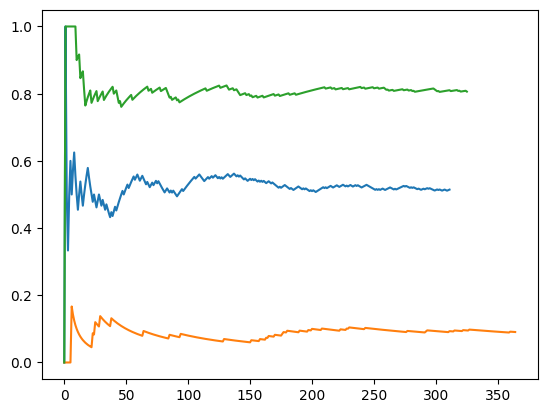

In [125]:
# increment rule 
import matplotlib.pyplot as plt
q=[0,0,0]
num_idx=[0,0,0]
plt_data=[[0],[0],[0]]
for idx in range(1000):
    click = np.random.randint(0, len(ads_on_page))
    num_idx[click] +=1 # this is not the number of impressions, running count of idx for plotting
    reward = ads_on_page[ click ].click()
    update = (1/num_idx[click])*(reward-q[click])
    q[click] = q[click] + update
    #print(f"click:{click}, reward:{reward} q[click]:{q[click]} update:{update}")
    plt_data[click].append(q[click])
print(f"q:{q}")
print(len(plt_data[0]),len(plt_data[1]),len(plt_data[2]))
plt.plot((plt_data[0]))
plt.plot((plt_data[1]))
plt.plot((plt_data[2]))


In [62]:
import math

q = [0,0,0]
N = [0,0,0]

foundFirst=False
foundSecond=False
foundThird=False

for x in range(100):
    if not foundFirst or not foundSecond or not foundThird:
        print(x)
        click_on_ad = np.random.randint(0, len(ads_on_page))
        #print(click_on_ad) # between 0-2
        res = ads_on_page[click_on_ad].click()
        #print(f"click on ad:{click_on_ad} is:{res}")
        N[click_on_ad] +=1
        q[click_on_ad] += 1/N[click_on_ad] * (res - q[click_on_ad])
        #print(f"x:{x} q:{q} N:{N}")
        if (abs(q[0] - 0.5) < 0.01) and not foundFirst:
            print(f"{q[0]} foundFirst:{N[0]}")
            foundFirst=True
        if (abs(q[1] - 0.1) < 0.01) and not foundSecond:
            print(f"{q[1]} foundSecond:{N[1]}")
            foundSecond=True
        if (abs(q[2] - 0.8) < 0.01) and not foundThird:
            print(f"{q[2]} foundThird:{N[2]}")
            foundThird=True
    else:
        print(f"stop {x}")
        break
        
print(f"N:{N} q:{q}")
#it converges then if keep running it diverges

0
1
2
0.5 foundFirst:2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
0.8 foundThird:5
25
26
27
28
29
0.09999999999999999 foundSecond:10
stop 30
N:[13, 10, 7] q:[0.4615384615384615, 0.09999999999999999, 0.8571428571428572]


<a href="https://github.com/christianversloot/machine-learning-articles/blob/main/simple-multi-options-a-b-n-test-with-multi-armed-bandit-in-python.md />

<h2>$\epsilon$ greedy</h2>
For stocastic rewards, distributions which change over time. 

<h4>Exercise 2.1 In greedy action selection, for the case of two actions and epsilon = 0.5, what is the probability that the greedy action is selected?</h4>

<h4>Answer:</h4>
if there are 2 actions and the greedy action ha probability $\epsilon$ of being selected then the other non greedy action has probability $1-\epsilon$ of being selected. If $\epsilon is given as 0.5$ then the $P(greedy) = 0.5$ and $P(non greedy) = 1-\epsilon = 0.5$
<br/>


<h2 span style="color:red">Warning: the chatgpt answer for 2.2 is incorrect. Does not get N correct</span></h2>

<h4>Exercise 2.2 Bandit example Consider a k-armed bandit problem with k = 4 actions, denoted 1, 2, 3, and 4. Consider applying to this problem a bandit algorithm using $\epsilon$ greedy action selection, sample-average action-value estimates, and initial estimates of Q1(a) = 0, for all a. Suppose the initial sequence of actions and rewards is A1 = 1, R1 =-1,A2 =2,R2 =1,A3 =2,R3 =-2,A4 =2,R4 =2,A5 =3,R5 =0. On some of these time steps the $\epsilon$ case may have occurred, causing an action to be selected at random. On which time steps did this definitely occur? On which time steps could this possibly have occurred?</h4>
<h4>Answer:</h4>
<h4>There are 4 arms. </h4>
<br/>
<h4>Use notation N(1) is number of times arm 1-4 clicked, N(1)=1, N(2)=0, N(3)=0, N(4)=0</h4>
means arm 1 was selected once and arms 2,3,4 have no actions. 
<br />
<br />
<h4>Time t=1</h4>
<h4>select arm1</h4>
<h4>We saw in the simulation session the sample avg is $\frac{1}{num\_clicks}\sum\limits_{i=0}^{num\_clicks}(R)$ where the num clicks is the number of times the arm is selected. It isn't the number of time steps. In time step 1 arm1 is selected followed by arm2 3 times then arm3 then no arms in time step 5</h4>
<br/ >
$Q_1(A=a1, arm1) = 0,Q_1(A=a2, arm2) = 0,Q_1(A=a3, arm3) = 0,Q_1(A=a4,arm4) = 0$
<br />
<h4>N for arm1 is 1, N(1)=1</h4>
<h4>select arm1, R=-1 ,the sample avg is $\frac{1}{N(1)=1}\sum(R) = \frac{1}{1}*(0-1)=-1$</h4>
$Q=(-1,0,0,0)$
<h4>Time t=2</h4>
<h4>N for arm2 is 1, N(2)=1</h4>
<h4>select arm2, R=1 ,the sample avg is $\frac{1}{1}\sum(R) = \frac{1}{1}*(0+1)=1$</h4>
$Q=(-1,1,0,0)$
<br />
<h4>Time t=3</h4>
<h4>N for arm2 is 2, N(2)=2</h4>
<h4>select arm2, R= -2 ,the sample avg is $\frac{1}{2}\sum(R) = \frac{1}{2}*(0+1-2)=-0.5$</h4>
$Q=(-1,-0.5,0,0)$
<br />
<h4>Time t=4</h4>
<h4>N for arm2 is 3, N(2)=3</h4>
<h4>select arm2, R=2 ,the sample avg is $\frac{1}{3}\sum(R) = \frac{1}{3}*(0+1-2+2)= 0.33$</h4>
$Q=(-1,1/3,0,0)$
<br />
<h4>Time t=5</h4>
<h4>N for arm3 is 1, N(3)=1</h4>
<h4>select arm2, R=2 ,the sample avg is $\frac{1}{3}\sum(R) = \frac{1}{1}*(0+1)= 1$</h4>
$Q=(-1,1/3,1,0)$
<br />
<h4>Time t=6</h4>
<br />
$Q=(-1,1/3,1,0)$
<h4>no actions, state same as aboave </h4>


<h4>Exercise 2.3 In the comparison shown in Figure 2.2, which method will perform best in the long run in terms of cumulative reward and probability of selecting the best action? How much better will it be? Express your answer quantitatively.</h4>


In [ ]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(42)
k = 10
n_steps = 100
n_runs = 200

avg_rewards = torch.zeros(n_steps)

for run in range(n_runs):
    Q = torch.full((k,), 5.0)         # Optimistic initial values
    N = torch.zeros(k)
    true_means = torch.randn(k)       # N(0,1) for each arm
    rewards = []

    for t in range(n_steps):
        action = torch.argmax(Q).item()
        reward = torch.normal(true_means[action], 1.0).item()
        N[action] += 1
        Q[action] += (1 / N[action]) * (reward - Q[action])
        rewards.append(reward)

    avg_rewards += torch.tensor(rewards)

avg_rewards /= n_runs

plt.plot(avg_rewards)
plt.axhline(0.0, color='r', linestyle='--', label="True Mean = 0")
plt.title("Optimistic Initialization: Reward Spikes (Exercise 2.6)")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.grid(True)
plt.legend()
plt.show()

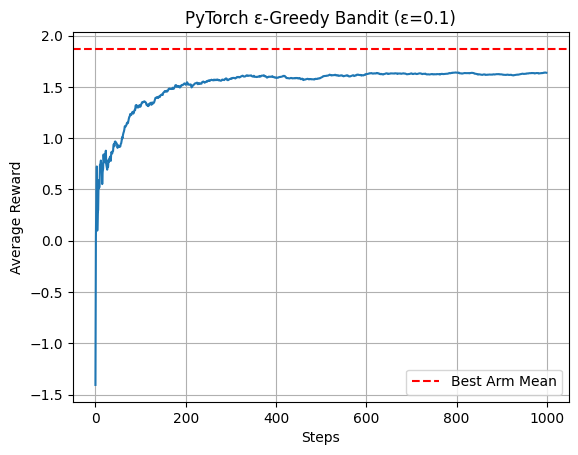

In [126]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Parameters
k = 10  # number of arms
steps = 1000  # number of pulls
epsilon = 0.1  # exploration rate
true_means = torch.randn(k)  # true reward for each arm ~ N(0,1)

# Agent state
q_values = torch.zeros(k)  # estimated Q-values
counts = torch.zeros(k)    # number of times each arm has been selected
rewards = []

# Bandit loop
for t in range(steps):
    # ε-greedy action selection
    if torch.rand(1).item() < epsilon:
        action = torch.randint(0, k, (1,)).item()  # explore
    else:
        action = torch.argmax(q_values).item()  # exploit

    # Simulate reward from true distribution (Gaussian)
    reward = torch.randn(1).item() + true_means[action]
    rewards.append(reward)

    # Update Q-value (sample average)
    counts[action] += 1
    q_values[action] += (reward - q_values[action]) / counts[action]

# Plot average reward
avg_reward = torch.cumsum(torch.tensor(rewards), dim=0) / torch.arange(1, steps + 1)
plt.plot(avg_reward.numpy())
plt.axhline(true_means.max().item(), linestyle='--', color='red', label='Best Arm Mean')
plt.title(f'PyTorch ε-Greedy Bandit (ε={epsilon})')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()
plt.grid()
plt.show()


In [127]:
true_means.max().item()

1.8695240020751953

#https://web.stanford.edu/~bvr/pubs/TS_Tutorial.pdf

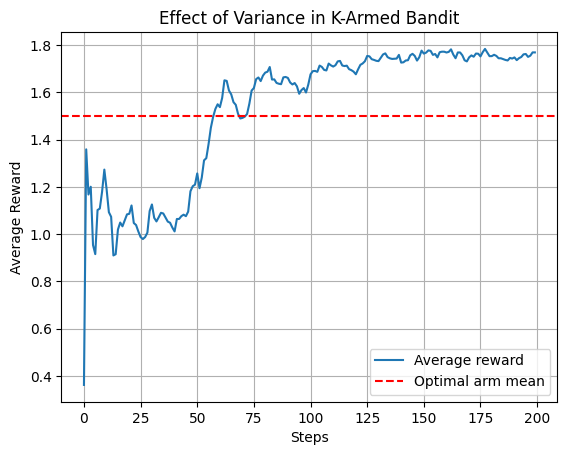

In [2]:
import torch
import matplotlib.pyplot as plt

# Set seed for reproducibility
torch.manual_seed(42)

# True means and variances
true_means = torch.tensor([1.0, 1.5, 1.2])
true_vars  = torch.tensor([1.0, 4.0, 0.1])
k = len(true_means)
n_steps = 200

# Initialize estimates and counts
Q = torch.zeros(k)
N = torch.zeros(k)

# Reward history
rewards = []

# ε-greedy with ε=0.1
epsilon = 0.1

for step in range(n_steps):
    if torch.rand(1).item() < epsilon:
        action = torch.randint(0, k, (1,)).item()
    else:
        action = torch.argmax(Q).item()
    
    # Sample reward from N(μ, σ²)
    reward = torch.normal(true_means[action], true_vars[action]**0.5).item()
    
    # Update estimate
    N[action] += 1
    Q[action] += (1 / N[action]) * (reward - Q[action])
    
    rewards.append(reward)

# Plot
plt.plot(torch.cumsum(torch.tensor(rewards), dim=0) / (torch.arange(n_steps) + 1), label='Average reward')
plt.axhline(true_means.max().item(), color='r', linestyle='--', label='Optimal arm mean')
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Effect of Variance in K-Armed Bandit")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(42)
k = 10
n_steps = 100
n_runs = 200

avg_rewards = torch.zeros(n_steps)

for run in range(n_runs):
    Q = torch.full((k,), 5.0)         # Optimistic initial values
    N = torch.zeros(k)
    true_means = torch.randn(k)       # N(0,1) for each arm
    rewards = []

    for t in range(n_steps):
        action = torch.argmax(Q).item()
        reward = torch.normal(true_means[action], 1.0).item()
        N[action] += 1
        Q[action] += (1 / N[action]) * (reward - Q[action])
        rewards.append(reward)

    avg_rewards += torch.tensor(rewards)

avg_rewards /= n_runs

plt.plot(avg_rewards)
plt.axhline(0.0, color='r', linestyle='--', label="True Mean = 0")
plt.title("Optimistic Initialization: Reward Spikes (Exercise 2.6)")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.grid(True)
plt.legend()
plt.show()

<h4>Exercise 2.4 If the step-size parameters, $\alpha_n$, are not constant, then the estimate Qn is a weighted average of previously received rewards with a weighting different from that given by (2.6). What is the weighting on each prior reward for the general case, analogous to (2.6), in terms of the sequence of step-size parameters?</h4>
<h4>Answer: This problem wants a separate $\alpha$ different for each step. Convert notation to $\alpha_n$</h4>
$Q_{n+1} = Q_n + \alpha(R_n - Q_n)$
<br />
<h4>write out a couple steps to see recurrence relation</h4>
$Q_0 = 0$
<br />
$Q_1 = Q_0 + \alpha_0(R_0-Q_0)$
<br />
$=\alpha_0(R_0)$
<br />
$Q_2 = Q_1 + \alpha_1(R_1-Q_1)$
<br />
$=Q_1 + \alpha_1(R_1 ) - \alpha_1(Q_1)=Q_1-\alpha_1(Q_1)+\alpha_1(R_1)=(1-\alpha_1)Q_1+\alpha_1R_1$
<br />
$=$
<br />
$Q_3 = Q_2 + \alpha_2(R_2-Q_2)$
<br />
$$
<br />
$$
<br />


In [ ]:
$$
<br />


Exercise 2.5 (programming) Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed in which all the $q_*(a)$ start out equal and then take independent random walks (say by adding a normally distributed increment with mean zero and standard deviation 0.01 to all the $q_*(a)$ on each step). Prepare plots like Figure 2.2 for an action-value method using sample averages, incrementally computed, and another action-value method using a constant step-size parameter, $\alpha = 0.1$. Use $\epsilon = 0.1$ and longer runs, say of 10,000 steps.

Exercise 2.6: Mysterious Spikes The results shown in Figure 2.3 should be quite reliable because they are averages over 2000 individual, randomly chosen 10-armed bandit tasks. Why, then, are there oscillations and spikes in the early part of the curve for the optimistic method? In other words, what might make this method perform particularly better or worse, on average, on particular early steps?

Exercise 2.7: Unbiased Constant-Step-Size Trick In most of this chapter we have used sample averages to estimate action values because sample averages do not produce the initial bias that constant step sizes do (see the analysis leading to (2.6)). However, sample averages are not a completely satisfactory solution because they may perform poorly on nonstationary problems. Is it possible to avoid the bias of constant step sizes while retaining their advantages on nonstationary problems? One way is to use a step size of
 n =. ↵/o ̄n, (2.8) to process the nth reward for a particular action, where ↵ > 0 is a conventional constant
step size, and o ̄n is a trace of one that starts at 0:
o ̄n=.o ̄n 1+↵(1 o ̄n 1), forn 0, witho ̄0=.0. (2.9)
Carry out an analysis like that in (2.6) to show that Qn is an exponential recency-weighted average without initial bias.

Exercise 2.8: UCB Spikes In Figure 2.4 the UCB algorithm shows a distinct spike in performance on the 11th step. Why is this? Note that for your answer to be fully satisfactory it must explain both why the reward increases on the 11th step and why it decreases on the subsequent steps. Hint: if c = 1, then the spike is less prominent.

Exercise 2.9 Show that in the case of two actions, the soft-max distribution is the same as that given by the logistic, or sigmoid, function often used in statistics and artificial neural networks.


Exercise 2.10 Suppose you face a 2-armed bandit task whose true action values change randomly from time step to time step. Specifically, suppose that, for any time step, the true values of actions 1 and 2 are respectively 0.1 and 0.2 with probability 0.5 (case A), and 0.9 and 0.8 with probability 0.5 (case B). If you are not able to tell which case you face at any step, what is the best expectation of success you can achieve and how should you behave to achieve it? Now suppose that on each step you are told whether you are facing case A or case B (although you still don’t know the true action values). This is an associative search task. What is the best expectation of success you can achieve in this task, and how should you behave to achieve it?